# Features of the human proteome

In [85]:
import os
import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
f_prot2vec = './prot2vec_data/protVec_100d_3grams.csv'
f_prot2vec_processed = './prot2vec_data/protVec_100d_3grams_processed.csv'

if os.path.isfile(f_prot2vec_processed):
    os.remove(f_prot2vec_processed)

with open(f_prot2vec_processed, 'a') as outfile:
    with open(f_prot2vec, 'r') as infile:
        for line in infile:
            l = re.sub(r'\s+', ',', line)
            l = l[1:-2] + '\n'
            outfile.write(l)

In [126]:
df = pd.read_csv(f_prot2vec_processed, header=None)

In [125]:
def get_vecotor_for_3gram(three_gram_, df_prot2vec_=df):
    return df_prot2vec_[df_prot2vec_[0]==three_gram_][[i for i in range(1, df_prot2vec_.shape[1])]].values

vec = get_vecotor_for_3gram('AAA')
if vec.size:
    print "Not Empty"

In [6]:
f_reviewed_protein_sequences =  './ProteinList/reviewed_sequences'
df_rev_proteins = pd.read_csv(f_reviewed_protein_sequences, header=None)
df_rev_proteins.shape

(20160, 1)

In [7]:
def get_length_distribution(dataframe, sequence_column=0, num_bins=10):
    x_min = 0
    x_max = 3000
    length = []
    for i in range(dataframe.shape[0]):
        length.append(len(dataframe.iloc[i, sequence_column]))
    plt.hist(length, bins=num_bins, range=(x_min, x_max))
    plt.show()

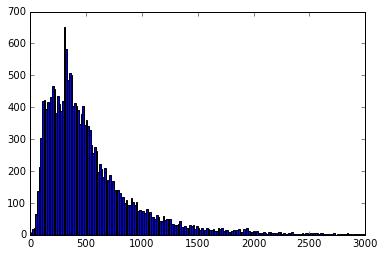

In [8]:
get_length_distribution(df_rev_proteins, num_bins=200)

In [9]:
MAGNITUDE_CHARGE_VAL = 1
POSITIVE_CHARGE_VAL = MAGNITUDE_CHARGE_VAL
NEGATIVE_CHARGE_VAL = -MAGNITUDE_CHARGE_VAL

amino_acid_charge_map = {
    "R": POSITIVE_CHARGE_VAL,
    "H": POSITIVE_CHARGE_VAL,
    "K": POSITIVE_CHARGE_VAL,
    "D": NEGATIVE_CHARGE_VAL,
    "E": NEGATIVE_CHARGE_VAL,
    "S": 0,
    "T": 0,
    "N": 0,
    "Q": 0,
    "C": 0,
    "U": 0,
    "G": 0,
    "P": 0,
    "A": 0,
    "V": 0,
    "I": 0,
    "L": 0,
    "M": 0,
    "F": 0,
    "Y": 0,
    "W": 0
}

# charge_type: net_charge_count, percent_positive, percent_negative, percent_any_charge

def get_charge_distribution(dataframe, sequence_column=0, 
                            num_bins=100, charge_type="net_charge_count", 
                            x_range=None, title=""):
    charge_distribution = []
    for i in range(dataframe.shape[0]):
        length = len(dataframe.iloc[i, sequence_column])
        charge = 0
        for am in dataframe.iloc[i, sequence_column]:
            if am in amino_acid_charge_map:
                charge_val = amino_acid_charge_map[am]
                if(charge_type=="net_charge_count"):
                    charge += charge_val
                elif(charge_type=="percent_positive"):
                    if(charge_val == POSITIVE_CHARGE_VAL):
                        charge += POSITIVE_CHARGE_VAL * 1.0 / length
                elif(charge_type=="percent_negative"):
                    if(charge_val == NEGATIVE_CHARGE_VAL):
                        charge += NEGATIVE_CHARGE_VAL * 1.0 / length
                elif(charge_type=="percent_any_charge"):
                    if(charge_val == NEGATIVE_CHARGE_VAL or charge_val == POSITIVE_CHARGE_VAL):
                        charge += MAGNITUDE_CHARGE_VAL * 1.0 / length
        charge_distribution.append(charge)
    if x_range is not None:
        plt.hist(charge_distribution, bins=num_bins, range=(x_range[0], x_range[1]))
        plt.title(title)
        plt.show()
    else:
        plt.hist(charge_distribution, bins=num_bins)
        plt.title(title)
        plt.show()

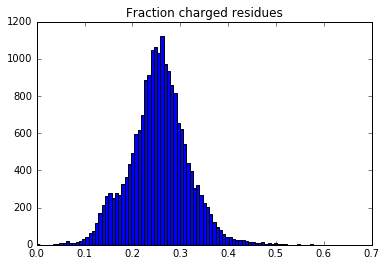

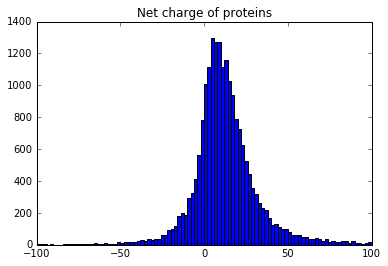

In [10]:
get_charge_distribution(df_rev_proteins, 
                        charge_type="percent_any_charge", 
                        title="Fraction charged residues")
get_charge_distribution(df_rev_proteins, 
                        charge_type="net_charge_count", 
                        x_range=(-100, 100), 
                        title="Net charge of proteins")

In [11]:
MAGNITUDE_HYDROPHOBIC_VAL = 1
amino_acid_hydrophobic_map = {
    "R": 0,
    "H": 0,
    "K": 0,
    "D": 0,
    "E": 0,
    "S": 0,
    "T": 0,
    "N": 0,
    "Q": 0,
    "C": 0,
    "U": 0,
    "G": 0,
    "P": 0,
    "A": MAGNITUDE_HYDROPHOBIC_VAL,
    "V": MAGNITUDE_HYDROPHOBIC_VAL,
    "I": MAGNITUDE_HYDROPHOBIC_VAL,
    "L": MAGNITUDE_HYDROPHOBIC_VAL,
    "M": MAGNITUDE_HYDROPHOBIC_VAL,
    "F": MAGNITUDE_HYDROPHOBIC_VAL,
    "Y": MAGNITUDE_HYDROPHOBIC_VAL,
    "W": MAGNITUDE_HYDROPHOBIC_VAL
}

def get_hydrophobic_distribution(dataframe, sequence_column=0, 
                                 num_bins=100, 
                                 x_range=None, title=""):
    hydrophobic_count_distribution = []
    for i in range(dataframe.shape[0]):
        hydrophobic_count = 0
        for am in dataframe.iloc[i, sequence_column]:
            if am in amino_acid_hydrophobic_map:
                hydrophobic_count += amino_acid_hydrophobic_map[am]
        hydrophobic_count_distribution.append(hydrophobic_count*1.0/len(dataframe.iloc[i, sequence_column]))
        
    if x_range is not None:
        plt.hist(hydrophobic_count_distribution, bins=num_bins, range=(x_range[0], x_range[1]))
        plt.title(title)
        plt.show()
    else:
        plt.hist(hydrophobic_count_distribution, bins=num_bins)
        plt.title(title)
        plt.show()

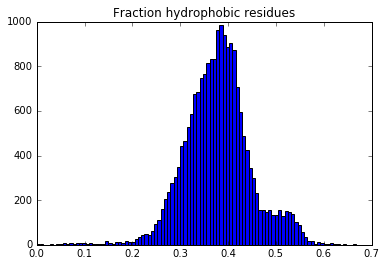

In [12]:
get_hydrophobic_distribution(df_rev_proteins, 
                             title="Fraction hydrophobic residues")

In [80]:
# Get the distribution of percent of each of the amino acid in the protiens
amino_acids = ["R", "H", "K", "D", "E", "S", "T", "N", "Q", "C", "U", "G",
               "P", "A", "V", "I", "L", "M", "F", "Y", "W"]

def get_amino_acic_distribution(dataframe, sequence_column=0, title=""):
    empty_amino_acid_distribution = {}
    total_amino_acid_distribution = {}
    for am in amino_acids:
        empty_amino_acid_distribution.update({am:0})
        total_amino_acid_distribution.update({am:[]})
    for i in range(dataframe.shape[0]):
        current_amino_acid_distribution = empty_amino_acid_distribution.copy()
        length = len(dataframe.iloc[i, sequence_column])
        for am in dataframe.iloc[i, sequence_column]:
            if am in current_amino_acid_distribution:
                current_amino_acid_distribution[am] += 1.0 / length
        for am in amino_acids:
            total_amino_acid_distribution[am].append(current_amino_acid_distribution[am])
    
    total_amino_acid_distribution_ = []
    for am in amino_acids:
        total_amino_acid_distribution_.append(total_amino_acid_distribution[am])
    
    
    #sns.set(style='whitegrid', context='notebook')
    #sns.pairplot(pd.DataFrame({"M": total_amino_acid_distribution["M"], 
    #                           "L": total_amino_acid_distribution["L"],
    #                           "K": total_amino_acid_distribution["K"]}), 
    #             size=2.5)
    
    fig = plt.figure(figsize=(15,10)) 
    ax_box = fig.add_subplot(111)
    ax_box.boxplot(total_amino_acid_distribution_, vert=True)
    
    plt.title(title)
    plt.ylim([0, 0.2])
    plt.xticks(np.arange(1, len(amino_acids)+1), amino_acids)
    plt.show()

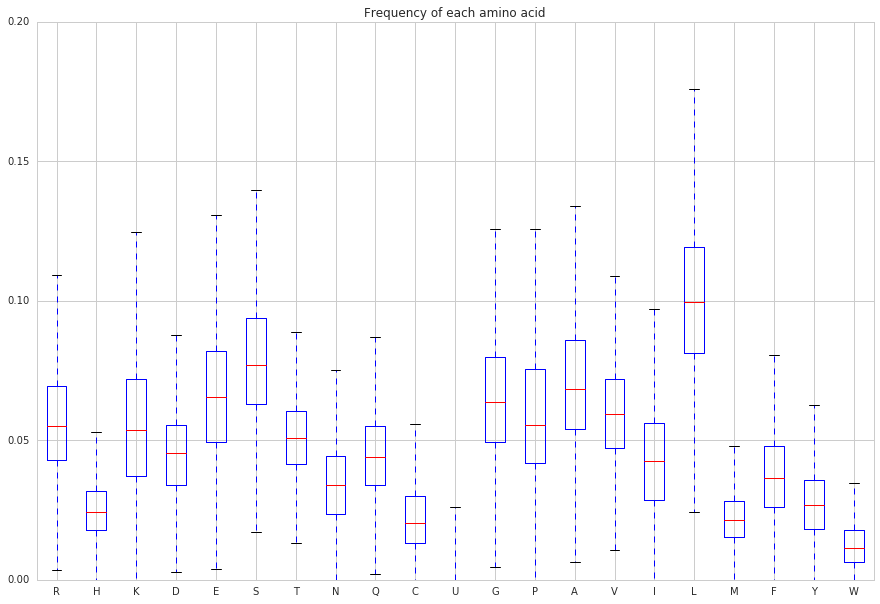

In [81]:
get_amino_acic_distribution(df_rev_proteins, title="Frequency of each amino acid")